# @The Sparks Foundation
# Name:Minal Gupta
# Task1
Dataset link: http://bit.ly/w-data

## **Prediction using Supervised Learning**

For predicting the percentage of a student based on the no. of studied hours


## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions.

### **Simple Linear Regression**
 This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  


In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## **Visualization of Data**

In [3]:
data.head(4) # it will show starting 4 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


In [4]:
data.tail(4) # it will show last 4 rows

,Hours,Scores
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.info() # it will show information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe() # it will describe the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.shape #  it will give shape of the data

(25, 2)

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. 

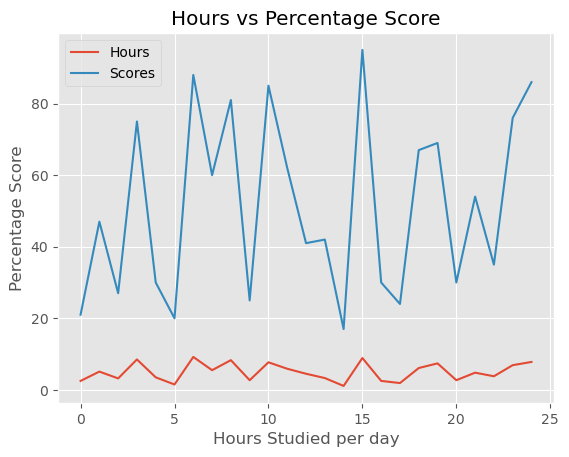

In [8]:
plt.style.use('ggplot')
data.plot(kind='line')
plt.title("Hours vs Percentage Score")
plt.xlabel('Hours Studied per day')  
plt.ylabel('Percentage Score')  
plt.show()

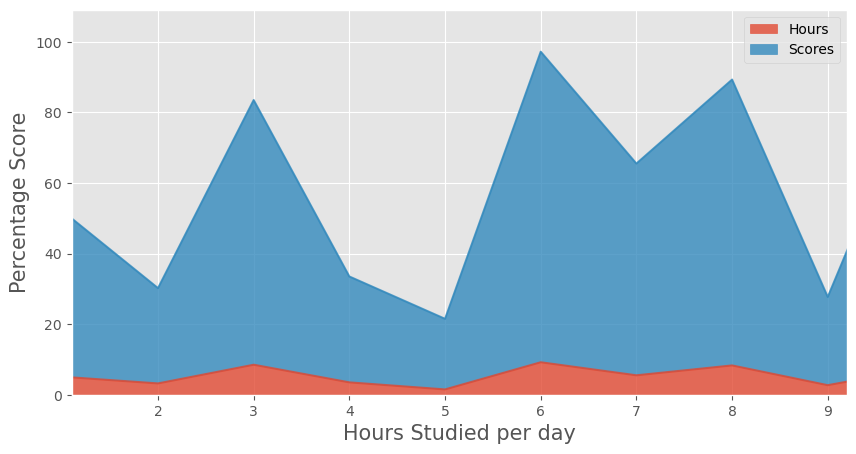

In [9]:
xmin=min(data.Hours)
xmax=max(data.Hours)
data.plot(kind='area',alpha=0.8,stacked=True,figsize=(10,5),xlim=(xmin,xmax))
plt.xlabel('Hours Studied per day',size=15)  
plt.ylabel('Percentage Score',size=15)  
plt.show()

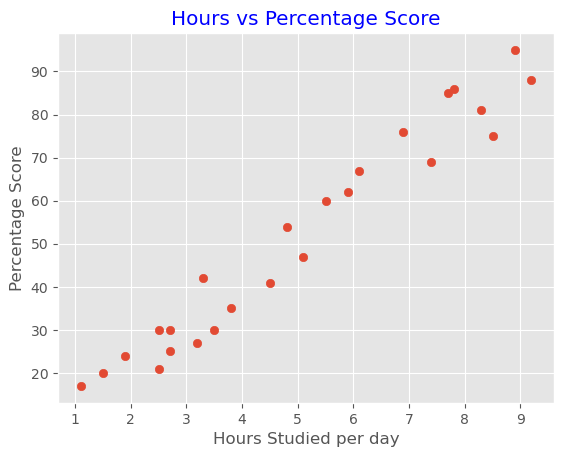

In [10]:
# Plotting the distribution of scores
plt.scatter(x=data.Hours, y=data.Scores)  
plt.title('Hours vs Percentage Score',color='blue')  
plt.xlabel('Hours Studied per day')  
plt.ylabel('Percentage Score')  
plt.show()

**From the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**


In [11]:
data.isnull().sum() # checking for null values

Hours     0
Scores    0
dtype: int64

In [12]:
data.mean() # mean

Hours      5.012
Scores    51.480
dtype: float64

In [13]:
data1=data.fillna(data.mean()) #fill null values with mean

In [14]:
data1.isnull().sum() 

Hours     0
Scores    0
dtype: int64

In [15]:
data1.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## **The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).**

In [16]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
print("shape of X",X.shape)
print("shape of y",y.shape)

shape of X (25, 1)
shape of y (25,)


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [18]:
print("shape of X_train",X_train.shape)
print("shape of X_test",X_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of X_train (20, 1)
shape of X_test (5, 1)
shape of y_train (20,)
shape of y_test (5,)


### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [19]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


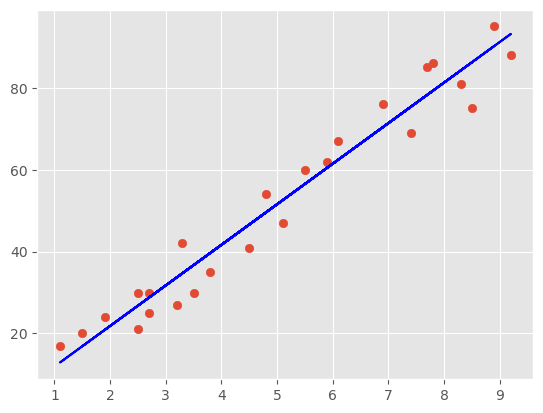

In [25]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='blue');
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [21]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error.

In [24]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
